In [3]:
import tensorflow as tf
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import cv2

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(train_data,train_labels), (test_data,test_labels) = mnist.load_data()
print(train_data.shape, test_data.shape)
print(train_labels.shape,test_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [6]:
digits_data = np.vstack([train_data,test_data])
digits_label = np.hstack([train_labels,test_labels])

digits_data.shape
digits_label.shape


(70000,)

<Axes: ylabel='count'>

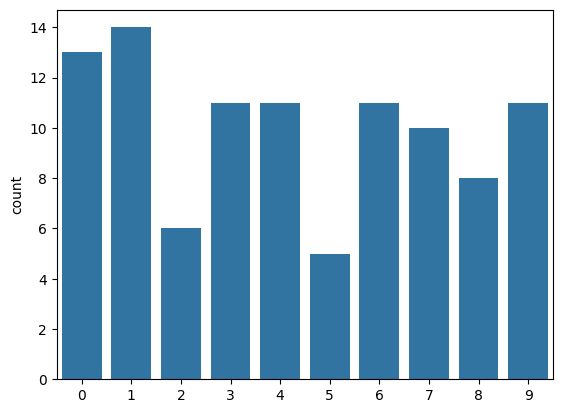

In [7]:
sns.countplot(x=digits_label[:100]) 

importing kaggle A/Z dataset

In [8]:
!curl -O https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  184M    0 15059    0     0  17492      0  3:04:30 --:--:--  3:04:30 17530
  1  184M    1 3550k    0     0  2174k      0  0:01:26  0:00:01  0:01:25 2176k
  5  184M    5 11.0M    0     0  4414k      0  0:00:42  0:00:02  0:00:40 4417k
 10  184M   10 18.7M    0     0  5393k      0  0:00:35  0:00:03  0:00:32 5395k
 14  184M   14 26.0M    0     0  5846k      0  0:00:32  0:00:04  0:00:28 5848k
 17  184M   17 33.0M    0     0  6093k      0  0:00:31  0:00:05  0:00:26 7206k
 21  184M   21 40.2M    0     0  6278k      0  0:00:30  0:00:06  0:00:24 7637k
 25  184M   25 46.4M    0     0  6295k      0  0:00:30  0:00:07  0:00:23 7257k
 28  184M   28 52.4M    0     0  6282k      0  0:00:30  0:00:08  0:00:22 6915k
 32  184M   32 59.6M    0     0  6394k      0  0:00

In [9]:
zipObject = zipfile.ZipFile(file = "alfabeto_A-Z.zip",mode='r')
zipObject.extractall('./')
zipObject.close()

In [10]:
datasetAZ = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')

In [11]:
print(datasetAZ)

           0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
372445  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372446  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372447  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372448  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372449  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

        0.641  0.642  0.643  0.644  0.6

In [12]:
alphabetData = datasetAZ.drop(
    labels='0',axis=1
)
alphabetLabels = datasetAZ['0']

In [13]:
print(alphabetData.shape,alphabetLabels.shape)

(372450, 784) (372450,)


In [14]:
print(alphabetLabels)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, Length: 372450, dtype: float32


In [15]:
alphabetData = np.reshape(alphabetData.values,(alphabetData.shape[0],28,28))

In [16]:
print(alphabetData.shape)

(372450, 28, 28)


Text(0.5, 1.0, 'CLASS: 20.0')

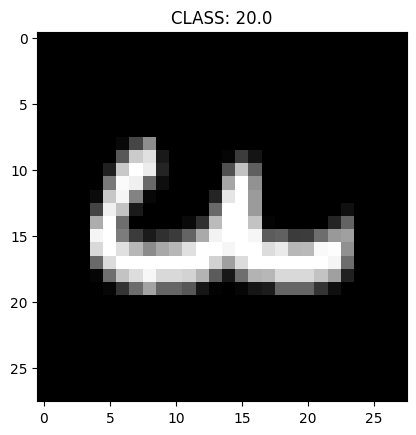

In [17]:
index = np.random.randint(0,alphabetData.shape[0])
plt.imshow(alphabetData[index],cmap='gray')
plt.title("CLASS: "+str(alphabetLabels[index]))

In [ ]:
sns.countplot(alphabetLabels.unique())